**Objective: Predict the success of a startup**

Features of the dataset include:
* R&D Spend
* Administration
* Marketing Spend
* State
* Profit

In [1]:
import numpy as np       
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
data=pd.read_csv('Business.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


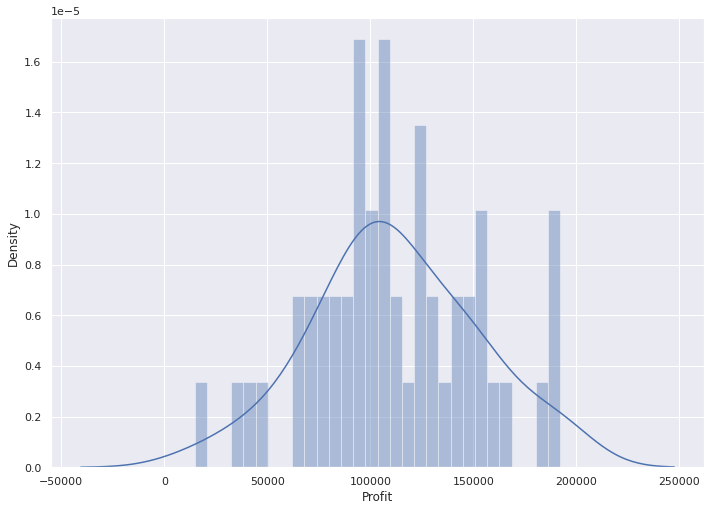

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['Profit'], bins = 30)
plt.show()

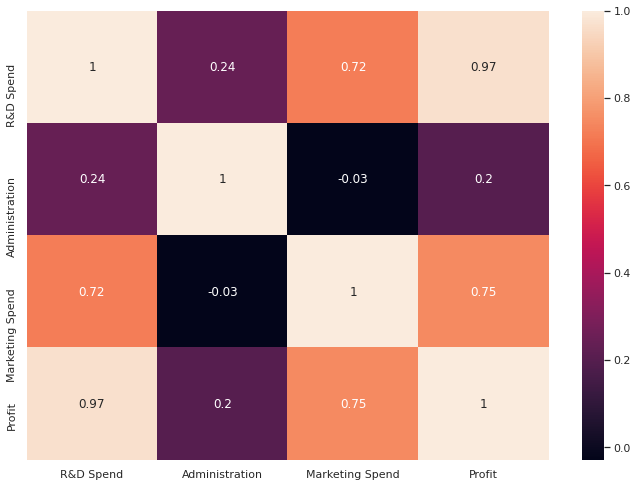

In [6]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

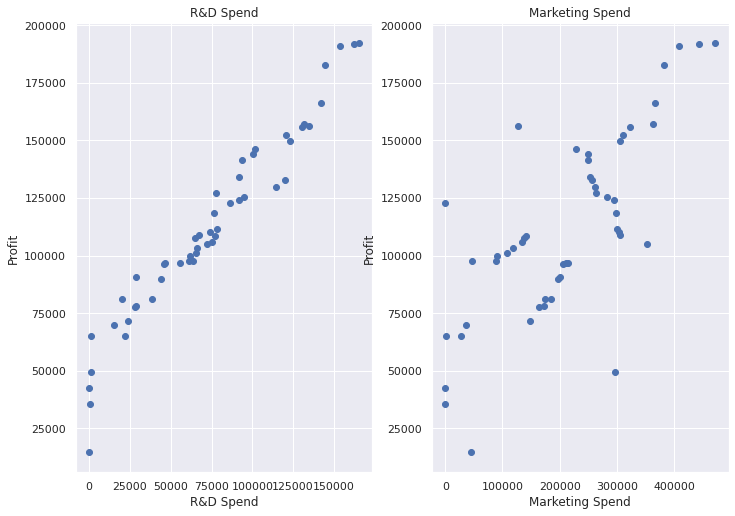

In [7]:
features = ['R&D Spend','Marketing Spend']
target = data['Profit']                   
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Profit')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print("Linear Regression Metrics")
d=[]
for i in range (1,4):          #LR_RDMS uses 'R&D Spend' and 'Marketing Spend' in the model
  for j in range (1,7):
    Y = data['Profit']                                           
    X = pd.DataFrame(np.c_[data['R&D Spend'],data['Marketing Spend']], columns= ['R&D Spend','Marketing Spend']) 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = i*.1,random_state=j)
    LR = LinearRegression()
    LR.fit(X_train, Y_train)
    y_train_predict = LR.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    mae = metrics.mean_absolute_error(Y_train, y_train_predict)
    mse = metrics.mean_squared_error(Y_train, y_train_predict)
    y_test_predict = LR.predict(X_test)
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2_test = r2_score(Y_test, y_test_predict)
    mae_test = metrics.mean_absolute_error(Y_test, y_test_predict)
    mse_test = metrics.mean_squared_error(Y_test, y_test_predict)   
    d.append((
        'LR_RDMS',
        j,
        i*.1,
        r2.round(4),
        rmse.round(4),
        mse.round(4),
        mae.round(4),
        r2_test.round(4),
        rmse_test.round(4),
        mse_test.round(4),
        mae_test.round(4),
        "PASSED" if r2_test > r2 else "FAILED",
        "PASSED" if rmse_test < rmse else "FAILED",
        "PASSED" if mse_test < mse else "FAILED",
        "PASSED" if mae_test < mae else "FAILED",
        (((r2_test/r2)-1)*100).round(4),
        (((rmse_test/rmse)-1)*100).round(4),
        (((mse_test/mse)-1)*100).round(4),
        (((mae_test/mae)-1)*100).round(4)
        ))
LRdf_RDMS=pd.DataFrame(d,columns=('Model','Random State','Test Size','Train R2','Train RMSE','Train MSE','Train MAE',
                             'Test R2','Test RMSE','Test MSE','Test MAE',
                             '_R2','_RMSE','_MSE','_MAE',
                             'R2 %','RMSE %','MSE %','MAE %'))
d=[]
for i in range (1,4):            #LR_MS uses 'Marketing Spend' in the model
  for j in range (1,7):
    Y = data['Profit']                                          
    X = pd.DataFrame(np.c_[data['Marketing Spend']],columns= ['Marketing Spend'])
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = i*.1,random_state=j)
    LR = LinearRegression()
    LR.fit(X_train, Y_train)
    y_train_predict = LR.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    mae = metrics.mean_absolute_error(Y_train, y_train_predict)
    mse = metrics.mean_squared_error(Y_train, y_train_predict)
    y_test_predict = LR.predict(X_test)
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2_test = r2_score(Y_test, y_test_predict)
    mae_test = metrics.mean_absolute_error(Y_test, y_test_predict)
    mse_test = metrics.mean_squared_error(Y_test, y_test_predict)   
    d.append((
        'LR_MS',
        j,
        i*.1,
        r2.round(4),
        rmse.round(4),
        mse.round(4),
        mae.round(4),
        r2_test.round(4),
        rmse_test.round(4),
        mse_test.round(4),
        mae_test.round(4),
        "PASSED" if r2_test > r2 else "FAILED",
        "PASSED" if rmse_test < rmse else "FAILED",
        "PASSED" if mse_test < mse else "FAILED",
        "PASSED" if mae_test < mae else "FAILED",
        (((r2_test/r2)-1)*100).round(4),
        (((rmse_test/rmse)-1)*100).round(4),
        (((mse_test/mse)-1)*100).round(4),
        (((mae_test/mae)-1)*100).round(4)
        ))
LRdf_MS=pd.DataFrame(d,columns=('Model','Random State','Test Size','Train R2','Train RMSE','Train MSE','Train MAE',
                             'Test R2','Test RMSE','Test MSE','Test MAE',
                             '_R2','_RMSE','_MSE','_MAE',
                             'R2 %','RMSE %','MSE %','MAE %'))
d=[]
for i in range (1,4):                 #LR_RD uses 'R & D Spend' in the model
  for j in range (1,7):
    Y = data['Profit']                                          
    X = pd.DataFrame(np.c_[data['R&D Spend']], columns= ['R&D Spend'])  
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = i*.1,random_state=j)
    LR = LinearRegression()
    LR.fit(X_train, Y_train)
    y_train_predict = LR.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    mae = metrics.mean_absolute_error(Y_train, y_train_predict)
    mse = metrics.mean_squared_error(Y_train, y_train_predict)
    y_test_predict = LR.predict(X_test)
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2_test = r2_score(Y_test, y_test_predict)
    mae_test = metrics.mean_absolute_error(Y_test, y_test_predict)
    mse_test = metrics.mean_squared_error(Y_test, y_test_predict)   
    d.append((
        'LR_RD',
        j,
        i*.1,
        r2.round(4),
        rmse.round(4),
        mse.round(4),
        mae.round(4),
        r2_test.round(4),
        rmse_test.round(4),
        mse_test.round(4),
        mae_test.round(4),
        "PASSED" if r2_test > r2 else "FAILED",
        "PASSED" if rmse_test < rmse else "FAILED",
        "PASSED" if mse_test < mse else "FAILED",
        "PASSED" if mae_test < mae else "FAILED",
        (((r2_test/r2)-1)*100).round(4),
        (((rmse_test/rmse)-1)*100).round(4),
        (((mse_test/mse)-1)*100).round(4),
        (((mae_test/mae)-1)*100).round(4)
        ))
LRdf_RD=pd.DataFrame(d,columns=('Model','Random State','Test Size','Train R2','Train RMSE','Train MSE','Train MAE',
                             'Test R2','Test RMSE','Test MSE','Test MAE',
                             '_R2','_RMSE','_MSE','_MAE',
                             'R2 %','RMSE %','MSE %','MAE %'))
LRALLdf=pd.concat([
                LRdf_RDMS.loc[(LRdf_RDMS['_R2'] == 'PASSED') &  (LRdf_RDMS['_RMSE'] == 'PASSED') &
                              (LRdf_RDMS['_MSE'] == 'PASSED') & (LRdf_RDMS['_MAE'] == 'PASSED')].drop(columns=['_R2','_RMSE','_MSE','_MAE']),
                LRdf_RD.loc[  (LRdf_RD['_R2'] == 'PASSED') &    (LRdf_RD['_RMSE'] == 'PASSED') &
                              (LRdf_RD['_MSE'] == 'PASSED') &   (LRdf_RD['_MAE'] == 'PASSED')].drop(columns=['_R2','_RMSE','_MSE','_MAE']),
                LRdf_MS.loc[  (LRdf_MS['_R2'] == 'PASSED') &    (LRdf_MS['_RMSE'] == 'PASSED') &
                              (LRdf_MS['_MSE'] == 'PASSED') &   (LRdf_MS['_MAE'] == 'PASSED')].drop(columns=['_R2','_RMSE','_MSE','_MAE'])
               ])
LRALLdf.sort_values(by='Test R2',ascending=False).head()

Linear Regression Metrics


,Model,Random State,Test Size,Train R2,Train RMSE,Train MSE,Train MAE,Test R2,Test RMSE,Test MSE,Test MAE,R2 %,RMSE %,MSE %,MAE %
7,LR_RDMS,2,0.2,0.9389,9458.9675,8.947207e+07,7049.1832,0.9814,6055.1471,3.666481e+07,4235.4038,4.5310,-35.9851,-59.0209,-39.9164
4,LR_RDMS,5,0.1,0.9487,9288.2131,8.627090e+07,6945.9651,0.9813,3811.4175,1.452690e+07,2370.8342,3.4395,-58.9650,-83.1613,-65.8675
16,LR_RD,5,0.3,0.9231,10488.8913,1.100168e+08,7886.6044,0.9790,5688.4405,3.235836e+07,4856.0736,6.0627,-45.7670,-70.5878,-38.4263
7,LR_RD,2,0.2,0.9346,9782.8306,9.570378e+07,7510.7308,0.9781,6566.3146,4.311649e+07,4495.0983,4.6573,-32.8792,-54.9480,-40.1510
16,LR_RDMS,5,0.3,0.9290,10074.0435,1.014864e+08,7572.1803,0.9778,5854.2671,3.427244e+07,4473.3424,5.2480,-41.8876,-66.2295,-40.9240


In [9]:
features = data.iloc[:,:-1].values
label = data.iloc[:,[-1]].values

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
        ("OneHot",
         OneHotEncoder(),
         [3]
         )
    ],
    remainder='passthrough'
)
features = transformer.fit_transform(features.tolist())
features = features.astype(float)

In [10]:
from sklearn.tree import DecisionTreeRegressor
print("Decision Tree Criterion: MSE")
d=[]
for i in range (2,10):              #DT_MSEdf uses the Decision Tree Algorithm with criterion MSE
  for j in range (2,7):
    for k in range (1,4):
      x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = k*.1,random_state=0)
      DT_MSE=DecisionTreeRegressor(min_samples_split=i,max_depth=j,criterion='mse',random_state=0)
      DT_MSE.fit(x_train,y_train)
      y_pred = DT_MSE.predict(x_test)
      mae=metrics.mean_absolute_error(y_test, y_pred)
      mse=metrics.mean_squared_error(y_test, y_pred)
      rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
      d.append(('DT_MSE',
                k*.1,
                i,
                j,
                DT_MSE.score(x_train,y_train).round(4),
                DT_MSE.score(x_test,y_test).round(4),
                'Test' if DT_MSE.score(x_test,y_test)>DT_MSE.score(x_train,y_train) else 'Train',
                mae.round(4),
                mse.round(4),
                rmse.round(4),
                (mae/data.Profit.mean()-1)*100,
                ((DT_MSE.score(x_test,y_test) - DT_MSE.score(x_train,y_train))*100).round(4)
                ))
DT_MSEdf=pd.DataFrame(d,columns=('Model','Test Size','Min Samples Split','Max Depth','Train Score','Test Score','Better Score',
                                 'MAE','MSE','RMSE','MAE Change %',
                                'Score Change %'
                                 ))
DT_MSEdf[DT_MSEdf['Better Score'] == 'Test']

Decision Tree Criterion: MSE


,Model,Test Size,Min Samples Split,Max Depth,Train Score,Test Score,Better Score,MAE,MSE,RMSE,MAE Change %,Score Change %
39,DT_MSE,0.1,4,5,0.9917,0.9947,Test,2675.4303,8.101710e+06,2846.3503,-97.611492,0.3011
42,DT_MSE,0.1,4,6,0.9926,0.9947,Test,2675.4303,8.101710e+06,2846.3503,-97.611492,0.2045


In [11]:
print("Decision Tree Criterion: MAE")
d=[]
for i in range (2,10):           #DT_MAEdf uses the Decision Tree Algorithm with criterion MAE
  for j in range (2,7):
    for k in range (1,4):
      x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = k*.1,random_state=0)
      DT_MAE=DecisionTreeRegressor(min_samples_split=i,max_depth=j,criterion='mae',random_state=0)
      DT_MAE.fit(x_train,y_train)
      y_pred = DT_MAE.predict(x_test)
      mae=metrics.mean_absolute_error(y_test, y_pred)
      mse=metrics.mean_squared_error(y_test, y_pred)
      rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
      d.append(('DT_MAE',
                k*.1,
                i,
                j,
                DT_MAE.score(x_train,y_train).round(4),
                DT_MAE.score(x_test,y_test).round(4),
                'Test' if DT_MAE.score(x_test,y_test) > DT_MAE.score(x_train,y_train) else 'Train',
                mae.round(4),
                mse.round(4),
                rmse.round(4),
                (mae/data.Profit.mean()-1)*100,
                ((DT_MAE.score(x_test,y_test) - DT_MAE.score(x_train,y_train))*100).round(4)
                ))
DT_MAEdf=pd.DataFrame(d,columns=('Model','Test Size','Min Samples Split','Max Depth','Train Score','Test Score','Better Score',
                                 'MAE','MSE','RMSE','MAE Change %','Score Change %'
                                 ))
DT_MAEdf[DT_MAEdf['Better Score'] == 'Test'].head()

Decision Tree Criterion: MAE


,Model,Test Size,Min Samples Split,Max Depth,Train Score,Test Score,Better Score,MAE,MSE,RMSE,MAE Change %,Score Change %
0,DT_MAE,0.1,2,2,0.8581,0.9794,Test,4530.115,3.130698e+07,5595.2642,-95.955711,12.1301
1,DT_MAE,0.2,2,2,0.8677,0.9074,Test,7455.145,1.184057e+08,10881.4399,-93.344372,3.9723
6,DT_MAE,0.1,2,4,0.9770,0.9834,Test,4652.290,2.529206e+07,5029.1209,-95.846638,0.6322
15,DT_MAE,0.1,3,2,0.8581,0.9794,Test,4530.115,3.130698e+07,5595.2642,-95.955711,12.1301
16,DT_MAE,0.2,3,2,0.8677,0.9074,Test,7455.145,1.184057e+08,10881.4399,-93.344372,3.9723


In [12]:
from sklearn.ensemble import RandomForestRegressor
print("Random Forest Criterion: MSE")
d=[]
for i in range (2,10):              #RF_MSEdf uses the Random Forest Algorithm with criterion MSE
  for j in range (2,7):
    for k in range (2,10):
      for l in range (1,4):
        x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = l*.1,random_state=0)
        RF_MSE=RandomForestRegressor(n_estimators=i,min_samples_split=j, max_depth=k, criterion='mse',random_state=0)
        RF_MSE.fit(x_train,y_train.ravel())
        y_pred = RF_MSE.predict(x_test)
        mae=metrics.mean_absolute_error(y_test, y_pred)
        mse=metrics.mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        d.append(('RF_MSE',
                  l*.1,
                  i,
                  j,
                  k,
                  RF_MSE.score(x_train,y_train).round(4),
                  RF_MSE.score(x_test,y_test).round(4),
                  'Test' if RF_MSE.score(x_test,y_test) > RF_MSE.score(x_train,y_train) else 'Train',
                  mae.round(4),
                  mse.round(4),
                  rmse.round(4),
                  (metrics.mean_absolute_error(y_test, y_pred)/data.Profit.mean()-1)*100,
                  ((RF_MSE.score(x_test,y_test) - RF_MSE.score(x_train,y_train))*100).round(4)
                  ))
RF_MSEdf=pd.DataFrame(d,columns=('Model','Test Size','n estimators','Min Samples Split','Max Depth','Train Score','Test Score',
                                 'Better Score','MAE','MSE','RMSE','MAE Change %','Score Change %'))
RF_MSEdf[RF_MSEdf['Better Score'] == 'Test']

Random Forest Criterion: MSE


,Model,Test Size,n estimators,Min Samples Split,Max Depth,Train Score,Test Score,Better Score,MAE,MSE,RMSE,MAE Change %,Score Change %


In [13]:
from sklearn.ensemble import RandomForestRegressor
print("Random Forest Criterion: MAE")
d=[]
for i in range (2,10):                #RF_MAEdf uses the Decision Tree Algorithm with criterion MAE
  for j in range (2,7):
    for k in range (2,10):
      for l in range (1,4):
        x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = l*.1,random_state=0)
        RF_MAE=RandomForestRegressor(n_estimators=i,min_samples_split=j, max_depth=k, criterion='mae',random_state=0)
        RF_MAE.fit(x_train,y_train.ravel())
        y_pred = RF_MAE.predict(x_test)
        mae=metrics.mean_absolute_error(y_test, y_pred)
        mse=metrics.mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        d.append(('RF_MAE',
                  l*.1,
                  i,
                  j,
                  k,
                  RF_MAE.score(x_train,y_train).round(4),
                  RF_MAE.score(x_test,y_test).round(4),
                  'Test' if RF_MAE.score(x_test,y_test) > RF_MAE.score(x_train,y_train) else 'Train',
                  mae.round(4),
                  mse.round(4),
                  rmse.round(4),
                  (metrics.mean_absolute_error(y_test, y_pred)/data.Profit.mean()-1)*100,
                  ((RF_MAE.score(x_test,y_test) - RF_MAE.score(x_train,y_train))*100).round(4)
                  ))
RF_MAEdf=pd.DataFrame(d,columns=('Model','Test Size','n estimators','Min Samples Split','Max Depth','Train Score','Test Score',
                                 'Better Score','MAE','MSE','RMSE','MAE Change %','Score Change %'))
RF_MAEdf[RF_MAEdf['Better Score'] == 'Test'].head()

Random Forest Criterion: MAE


,Model,Test Size,n estimators,Min Samples Split,Max Depth,Train Score,Test Score,Better Score,MAE,MSE,RMSE,MAE Change %,Score Change %
1,RF_MAE,0.2,2,2,2,0.8563,0.8580,Test,9626.6213,1.815826e+08,13475.2596,-91.405772,0.1668
10,RF_MAE,0.2,2,2,5,0.9673,0.9744,Test,4789.8790,3.269626e+07,5718.0640,-95.723805,0.7116
12,RF_MAE,0.1,2,2,6,0.9368,0.9733,Test,5794.7800,4.064496e+07,6375.3399,-94.826673,3.6436
25,RF_MAE,0.2,2,3,2,0.8563,0.8580,Test,9626.6213,1.815826e+08,13475.2596,-91.405772,0.1668
34,RF_MAE,0.2,2,3,5,0.9440,0.9442,Test,6501.5120,7.139543e+07,8449.5816,-94.195734,0.0126


In [14]:
# ML Model Summary
LR_df=LRALLdf
LR_df=LR_df.rename(columns={"Train R2": "Train Score",
                     "Test R2": "Test Score",
                     "Test RMSE": "RMSE",
                     "Test MSE": "MSE",
                     "Test MAE": "MAE",
                     "R2 %": "Score Change %",
                     "MAE %": "MAE Change %",
                     })
LR_df=LR_df[['Test Size','Train Score', 'Test Score','MAE Change %','Model','RMSE','MSE','MAE','Score Change %']]
MLdf=pd.concat([
                LR_df,
                DT_MSEdf.loc[DT_MSEdf['Better Score'] == 'Test'].drop(columns='Better Score'),
                DT_MAEdf.loc[DT_MAEdf['Better Score'] == 'Test'].drop(columns='Better Score'),
                RF_MSEdf.loc[RF_MSEdf['Better Score'] == 'Test'].drop(columns='Better Score'),
                RF_MAEdf.loc[RF_MAEdf['Better Score'] == 'Test'].drop(columns='Better Score')
               ])
print("ML Model Summary")
MLdf.sort_values(by='Test Score',ascending=False).head()

ML Model Summary


,Test Size,Train Score,Test Score,MAE Change %,Model,RMSE,MSE,MAE,Score Change %,Min Samples Split,Max Depth,n estimators
42,0.1,0.9926,0.9947,-97.611492,DT_MSE,2846.3503,8.101710e+06,2675.4303,0.2045,4.0,6.0,NaN
39,0.1,0.9917,0.9947,-97.611492,DT_MSE,2846.3503,8.101710e+06,2675.4303,0.3011,4.0,5.0,NaN
39,0.1,0.9885,0.9943,-97.614715,DT_MAE,2954.7893,8.730780e+06,2671.8210,0.5800,4.0,5.0,NaN
54,0.1,0.9853,0.9943,-97.614715,DT_MAE,2954.7893,8.730780e+06,2671.8210,0.8980,5.0,5.0,NaN
57,0.1,0.9853,0.9943,-97.614715,DT_MAE,2954.7893,8.730780e+06,2671.8210,0.8980,5.0,6.0,NaN


**In conclusion:**  

---
The Decision Tree (DT) Algorithm (A) shows to generate the best model for this dataset in comparison with the Linear Regression (LR) and
 Random Forest (RF) algorithms generated using different test sizes, minimum samples split, max depth and n estimators (RF).

Evaluations of the models are based on their R2 (LR), MAE and Regression Scores (DT & RF) from their respective algorithms along with some insights of RMSE, MSE.

* Generally, DTAs and RFAs show a drastic decrease in MAE


